In [3]:
# Define dataset slug and download dataset
import kagglehub
cctv_surveillance_dataset_path = kagglehub.dataset_download('rexayyyy/cctv-surveillance-dataset')
# Define download directory
download_path = './kaggle_dataset'  # Directory to save dataset

# # Unzip dataset
# !unzip -q data_slug/archive.zip -d download_path

# Confirm download
print(f"Dataset '{cctv_surveillance_dataset_path}' downloaded to '{download_path}'")

Dataset 'C:\Users\Abdul Salam\.cache\kagglehub\datasets\rexayyyy\cctv-surveillance-dataset\versions\1' downloaded to './kaggle_dataset'


In [4]:
!pip install ultralytics torch torchvision opencv-python matplotlib pillow

In [5]:
import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import yaml

In [6]:
# Load the YAML file
with open('data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Access the contents
print(data)
print("Train path:", data['train'])
print("Classes:", data['names'])

{'train': '../train/images', 'val': '../valid/images', 'nc': 4, 'names': ['ESF', 'accident', 'fighting', 'weapon']}
Train path: ../train/images
Classes: ['ESF', 'accident', 'fighting', 'weapon']


In [7]:
CONFIG = {
    'model_type': 'yolov8n.pt',  # Nano model for Jetson
    'img_size': 416,             # Reduced size
    'batch_size': 8,             # Small batches for 4GB RAM
    'epochs': 30,
    'workers': 2,                # Limited workers
    'data_path': './kaggle_dataset',
    'device': 'cuda:0' if torch.cuda.is_available() else 'cpu'
}

In [8]:
model = YOLO(CONFIG['model_type'])

In [9]:
print(os.path.exists('C:/Users/Abdul Salam/.cache/kagglehub/datasets/rexayyyy/cctv-surveillance-dataset/versions/1/CCTV Surveillance Dataset/data.yaml'))


True


In [28]:
results = model.train(
    data='C:/Users/Abdul Salam/.cache/kagglehub/datasets/rexayyyy/cctv-surveillance-dataset/versions/1/CCTV Surveillance Dataset/data.yaml',
    epochs=CONFIG['epochs'],
    imgsz=CONFIG['img_size'],
    batch=CONFIG['batch_size'],
    workers=CONFIG['workers'],
    device=CONFIG['device'],
    patience=10,
    save=True 
)

Ultralytics 8.3.49  Python-3.9.0 torch-2.5.1+cpu CPU (Intel Core(TM) i5-8250U 1.60GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/Abdul Salam/.cache/kagglehub/datasets/rexayyyy/cctv-surveillance-dataset/versions/1/CCTV Surveillance Dataset/data.yaml, epochs=30, time=None, patience=10, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=cpu, workers=2, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

100%|████████████████████████████████████████████████████████████████████████████████| 755k/755k [00:01<00:00, 672kB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 225 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning C:\Users\Abdul Salam\.cache\kagglehub\datasets\rexayyyy\cctv-surveillance-dataset\versions\1\CCTV Surve


train: New cache created: C:\Users\Abdul Salam\.cache\kagglehub\datasets\rexayyyy\cctv-surveillance-dataset\versions\1\CCTV Surveillance Dataset\train\labels.cache


val: Scanning C:\Users\Abdul Salam\.cache\kagglehub\datasets\rexayyyy\cctv-surveillance-dataset\versions\1\CCTV Surveil


val: New cache created: C:\Users\Abdul Salam\.cache\kagglehub\datasets\rexayyyy\cctv-surveillance-dataset\versions\1\CCTV Surveillance Dataset\valid\labels.cache
Plotting labels to runs\detect\train6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs\detect\train6
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.153      2.016      1.379         25        416: 100%|██████████| 2500/2500 [59:56<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.161      0.185     0.0819     0.0259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.072      1.656      1.313         32        416: 100%|██████████| 2500/2500 [56:58<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259       0.23      0.199      0.154     0.0611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      1.026      1.572      1.287         47        416: 100%|██████████| 2500/2500 [1:07:45<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.271      0.199      0.194     0.0905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G     0.9955      1.515      1.271         49        416: 100%|██████████| 2500/2500 [56:21<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.293      0.209      0.191     0.0874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G     0.9588      1.443      1.249         27        416: 100%|██████████| 2500/2500 [55:46<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.311      0.248      0.221       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G     0.9392      1.404       1.24         51        416: 100%|██████████| 2500/2500 [56:57<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.273      0.248      0.215      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G     0.9174      1.358      1.228         62        416: 100%|██████████| 2500/2500 [55:59<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.335      0.249      0.226      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G     0.9056      1.339      1.221         50        416: 100%|██████████| 2500/2500 [55:56<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.291      0.236        0.2     0.0915

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G     0.8863      1.307      1.208         31        416: 100%|██████████| 2500/2500 [55:54<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.316      0.237      0.208     0.0907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      0.875      1.275      1.202         52        416: 100%|██████████| 2500/2500 [55:51<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.307      0.284      0.245      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G     0.8714      1.261      1.198         31        416: 100%|██████████| 2500/2500 [56:07<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.367        0.3      0.286      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G     0.8507      1.234      1.188         22        416: 100%|██████████| 2500/2500 [55:52<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.327      0.268      0.246      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G     0.8468      1.219      1.182         35        416: 100%|██████████| 2500/2500 [55:46<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.417      0.286      0.282      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G     0.8388      1.206      1.182         61        416: 100%|██████████| 2500/2500 [56:00<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259       0.42      0.311      0.302      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G     0.8317      1.184      1.173         32        416: 100%|██████████| 2500/2500 [56:51<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.361      0.304      0.279      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G     0.8212      1.169      1.171         30        416: 100%|██████████| 2500/2500 [56:13<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.403      0.322      0.312      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G     0.8142      1.149      1.165         42        416: 100%|██████████| 2500/2500 [56:39<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.415       0.32      0.313      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G     0.8057       1.14       1.16         29        416: 100%|██████████| 2500/2500 [56:27<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.418      0.315      0.318      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G     0.8001      1.127      1.157         41        416: 100%|██████████| 2500/2500 [57:11<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.421      0.305      0.308      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G     0.7927      1.109      1.152         40        416: 100%|██████████| 2500/2500 [56:34<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.443      0.323      0.334      0.161
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.7886      1.005      1.143         22        416: 100%|██████████| 2500/2500 [58:15<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.411      0.341      0.336      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G      0.777     0.9736      1.137         27        416: 100%|██████████| 2500/2500 [55:46<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.431      0.344      0.341      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G     0.7695     0.9523      1.129         21        416: 100%|██████████| 2500/2500 [57:01<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [04:


                   all       3456       4259      0.424      0.351      0.344      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G     0.7626     0.9342      1.125         21        416: 100%|██████████| 2500/2500 [56:22<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.435      0.368      0.357      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G     0.7507     0.9174      1.116         17        416: 100%|██████████| 2500/2500 [56:45<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.446      0.357      0.355      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.7438     0.9074      1.113         15        416: 100%|██████████| 2500/2500 [57:34<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.424      0.352      0.345      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G      0.737     0.8876      1.111         18        416: 100%|██████████| 2500/2500 [57:18<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.431       0.36      0.357       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.7276     0.8686      1.102         25        416: 100%|██████████| 2500/2500 [59:15<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259       0.45      0.365      0.359      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G     0.7226     0.8596      1.101         17        416: 100%|██████████| 2500/2500 [1:03:48<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [04:


                   all       3456       4259      0.443      0.357      0.355      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G      0.717     0.8458      1.099         24        416: 100%|██████████| 2500/2500 [1:08:27<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.447      0.349      0.353      0.175

30 epochs completed in 30.770 hours.
Optimizer stripped from runs\detect\train6\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train6\weights\best.pt, 6.2MB

Validating runs\detect\train6\weights\best.pt...
Ultralytics 8.3.49  Python-3.9.0 torch-2.5.1+cpu CPU (Intel Core(TM) i5-8250U 1.60GHz)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [03:


                   all       3456       4259      0.431      0.361      0.357       0.18
                   ESF        885       1417      0.421       0.41      0.367       0.13
              accident        720        741      0.459      0.335      0.331      0.136
              fighting        608        737      0.235     0.0624      0.075     0.0219
                weapon       1243       1364       0.61      0.635      0.656      0.431
Speed: 0.9ms preprocess, 46.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\detect\train6


In [10]:
def run_inference(image_path):
    results = model.predict(
        source=image_path,
        conf=0.25,
        iou=0.45,
        imgsz=CONFIG['img_size'],
        device=CONFIG['device']
    )
    return results[0]

In [11]:
def plot_detections(img_path, result):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(8, 8))
    for box in result.boxes:
        x1, y1, x2, y2 = [int(c) for c in box.xyxy[0]]
        cls = int(box.cls[0])
        conf = box.conf[0]
        
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label = f"{model.names[cls]} {conf:.2f}"
        cv2.putText(img, label, (x1, y1-10), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()


image 1/1 C:\Users\Abdul Salam\.cache\kagglehub\datasets\rexayyyy\cctv-surveillance-dataset\versions\1\CCTV Surveillance Dataset\train\images\2accidentFrame288_jpg.rf.94771e3b6f91056b80cac09f7996bacf.jpg: 416x416 1 person, 1 horse, 148.9ms
Speed: 8.2ms preprocess, 148.9ms inference, 14.0ms postprocess per image at shape (1, 3, 416, 416)


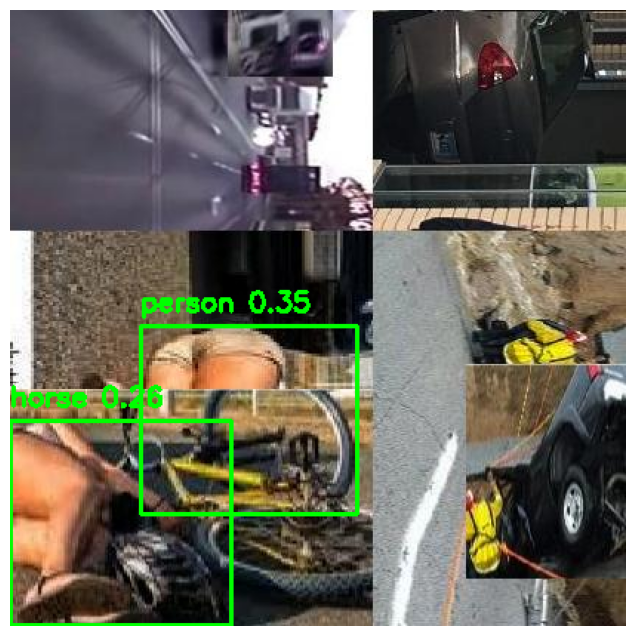

In [12]:
test_image = "C:/Users/Abdul Salam/.cache/kagglehub/datasets/rexayyyy/cctv-surveillance-dataset/versions/1/CCTV Surveillance Dataset/train/images/2accidentFrame288_jpg.rf.94771e3b6f91056b80cac09f7996bacf.jpg"  # Adjust path as needed
result = run_inference(test_image)
plot_detections(test_image, result)

In [13]:
# save trained model
model.export(format='torchscript', batch=CONFIG['batch_size'], name='best')

Ultralytics 8.3.49  Python-3.9.0 torch-2.5.1+cpu CPU (Intel Core(TM) i5-8250U 1.60GHz)

PyTorch: starting from 'yolov8n.pt' with input shape (8, 3, 640, 640) BCHW and output shape(s) (8, 84, 8400) (6.2 MB)

TorchScript: starting export with torch 2.5.1+cpu...
TorchScript: export success  5.6s, saved as 'yolov8n.torchscript' (12.5 MB)

Export complete (6.9s)
Results saved to C:\Users\Abdul Salam\Desktop\ML and AI
Predict:         yolo predict task=detect model=yolov8n.torchscript imgsz=640  
Validate:        yolo val task=detect model=yolov8n.torchscript imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'yolov8n.torchscript'

In [18]:
# Define the directory path
save_dir = "C:/Users/Abdul Salam/.cache/kagglehub/datasets/rexayyyy/saved-model"

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Save the model
model.save(os.path.join(save_dir, "Model.h5"))


In [22]:


# Define the file path using a raw string
model_path = "C:/Users/Abdul Salam/Desktop/ML and AI/runs/detect/train6/weights"

# Check if the file exists
if os.path.isfile(model_path):
    # Load the Keras model
    model = keras.models.load_model(model_path)
    # Display the model summary
    model.summary()
else:
    print(f"File not found: {model_path}")

File not found: C:/Users/Abdul Salam/Desktop/ML and AI/runs/detect/train6/weights
